In [1]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
#reading the source file and creating the dataframes
ad=pd.read_csv('application_data.csv')
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
pa=pd.read_csv('previous_application.csv')
pa.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
#checking size of the dataframes
print(ad.shape, pa.shape)

(307511, 122) (1670214, 37)


In [6]:
#getting some info about the dataframes
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
#knowing the columns
ad_col=ad.columns
ad_col

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
pa_col=pa.columns
pa_col

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
ad.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [11]:
pa.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

<font color='green'>  
Insight for data at first glance:
 
    1. Application data has 307511 rows and 122 columns and the previous application data has 1670214 rows and 37columns.
    2. There are some object data types in both the data sets which need to be analysed in details.
    3. There are some negative values and some null values also which need to be checked and cleansed accordingly.
</font>

<font color='blue'>
Data cleaning - Handling Missing values</font>

1. dropping the columns with more no of missing/null values
2. imputing data to replace the missing values


In [ ]:
#checking for null values in application_data
nv=ad.isnull().sum()/len(ad)*100
nv

In [15]:
nulls40=nv[nv>40]
len(nulls40)

49

In [16]:
#dropping columns with more than 40% null values
ad.drop(columns=nulls40.index, inplace=True)
ad.shape

(307511, 73)

In [17]:
nv1=ad.isnull().sum()/len(ad)*100
nv1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [18]:
ad.drop(labels=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21'
], axis=1, inplace=True)
ad.shape

(307511, 53)

In [19]:
ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [21]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [22]:
ad.drop(labels=['WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL'
], axis=1, inplace=True)
ad.shape

(307511, 45)

In [23]:
ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DA

In [24]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [25]:
ad.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [27]:
#Imputing Values for the some of the columns to replace the null values
ad.AMT_ANNUITY.fillna(ad.AMT_ANNUITY.mean(),inplace=True)
ad.AMT_ANNUITY.isnull().sum()

0

In [28]:
ad.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [30]:
ad.AMT_GOODS_PRICE.fillna(ad.AMT_GOODS_PRICE.mean(),inplace=True)
ad.AMT_GOODS_PRICE.isnull().sum()

0

In [31]:
ad.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [39]:
ad.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)
ad.NAME_TYPE_SUITE.isnull().sum()

0

In [40]:
ad.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [41]:
ad.OCCUPATION_TYPE.fillna('Unknown',inplace=True)
ad.OCCUPATION_TYPE.isnull().sum()

0

In [42]:
ad.OCCUPATION_TYPE.describe()

count      307511
unique         19
top       Unknown
freq        96391
Name: OCCUPATION_TYPE, dtype: object

In [46]:
ad.CNT_FAM_MEMBERS.median()

2.0

In [47]:
ad.CNT_FAM_MEMBERS.fillna(ad.CNT_FAM_MEMBERS.median(),inplace=True)
ad.CNT_FAM_MEMBERS.isnull().sum()

0

In [53]:
ad.isnull().sum() 

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [56]:
ad.drop(labels=['DAYS_LAST_PHONE_CHANGE'],axis=1, inplace=True)
ad.shape

(307511, 44)

In [57]:
rest_nul_cols=['EXT_SOURCE_2',
'EXT_SOURCE_3',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]
ad.fillna(ad[rest_nul_cols].median(), inplace=True)
#Sanity check after removing all nulls
ad.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

<font color='green'> 
Data cleaning - Handling Ouliers
 </font>

In [58]:
ad.shape

(307511, 44)

In [60]:
ad.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [75]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 44 columns]

In [76]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [74]:
ad.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [77]:
ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [79]:
ad.EXT_SOURCE_2.value_counts()

0.285898    721
0.565961    662
0.262258    417
0.265256    343
0.159679    322
           ... 
0.115152      1
0.062815      1
0.009800      1
0.150713      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [80]:
ad.EXT_SOURCE_3.value_counts()

0.535276    61751
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.021492        1
0.019468        1
0.023062        1
0.014556        1
0.043227        1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [92]:
c_list=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in c_list:
    print(ad[i].value_counts(), end='\n')

0    305885
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0    306022
1      1292
2       106
3        45
4        26
5         9
6         8
9         2
8         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0    298975
1      8208
2       199
3        58
4        34
6        20
5        10
8         5
7         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Na

In [93]:
#manipulating the data type of some of the numeric columns
for i in c_list:
    ad[i]=ad[i].astype('int64')

for i in c_list:
    print(ad[i].value_counts(), end='\n')

0    305885
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0    306022
1      1292
2       106
3        45
4        26
5         9
6         8
9         2
8         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0    298975
1      8208
2       199
3        58
4        34
6        20
5        10
8         5
7         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0     263752
1      33147
2       5386
3       1991
4       1076
5        602
6        343
7        298
9        206
8        185
10       132
11       119
12        77
13        72
14        40
15        35
16        23
17        14
18         6
19         3
24         1
23         1
27         1
22         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0      256936
1       33862
2       14412
3        1717
4         476
5          64
6          28
8           7
7           7
261         1
19          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
1     104924
0      71801


In [96]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [97]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                          0                           1  
1                          0                           0  
2                          0                           0  
3                          0                           1  
4                          0                           0  

[5 rows x 44 columns]

<font color='green'>  
Plotting some of the numeric variables to find the outliers
</font>

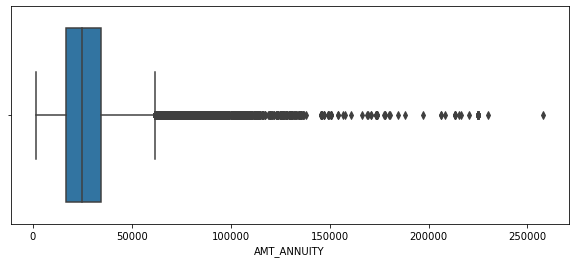

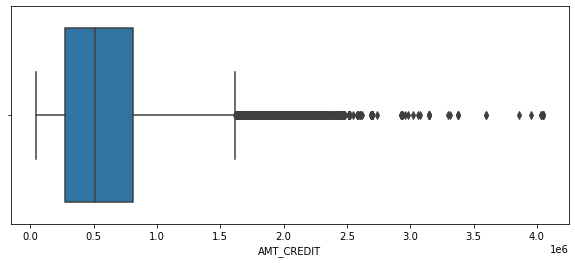

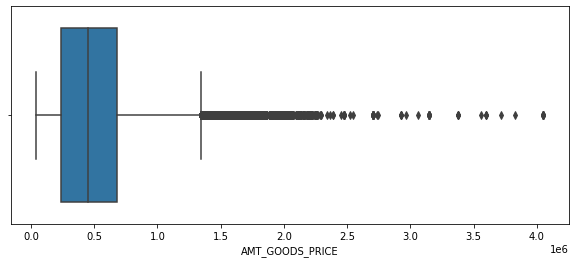

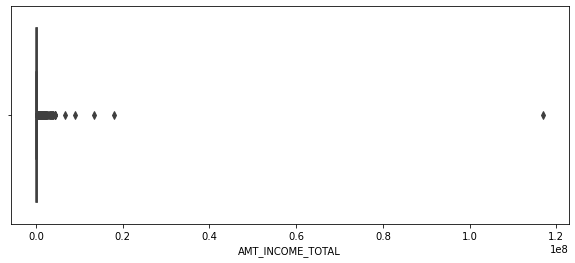

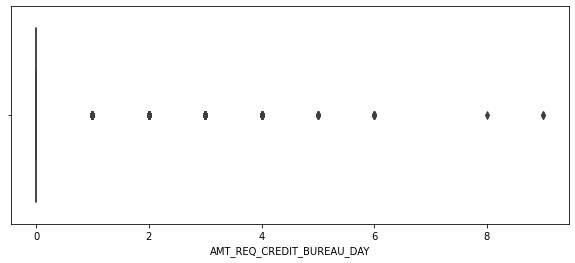

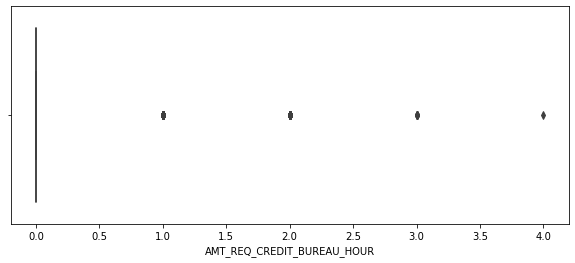

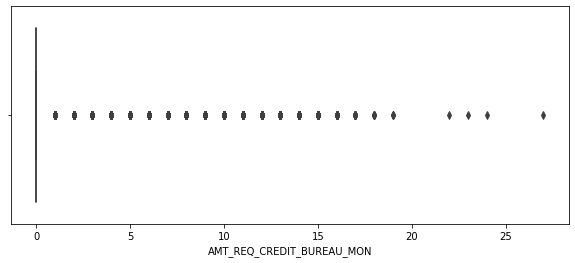

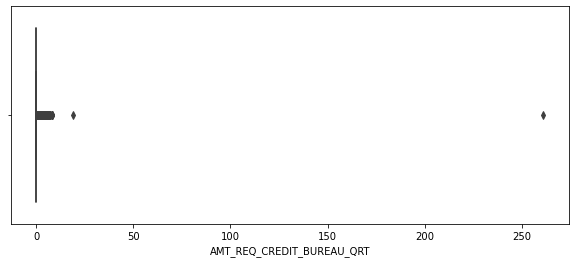

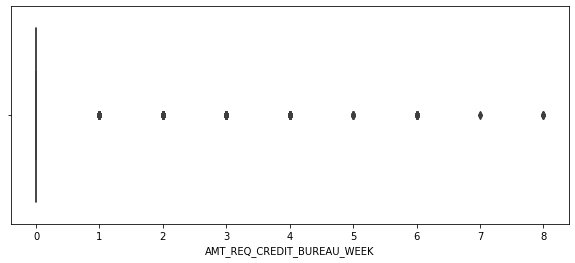

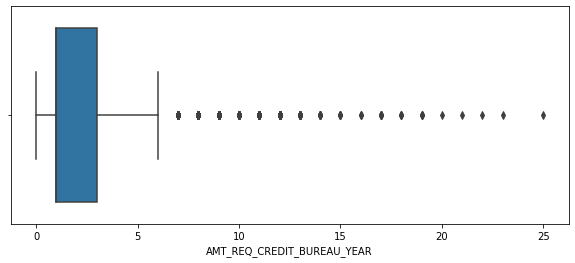

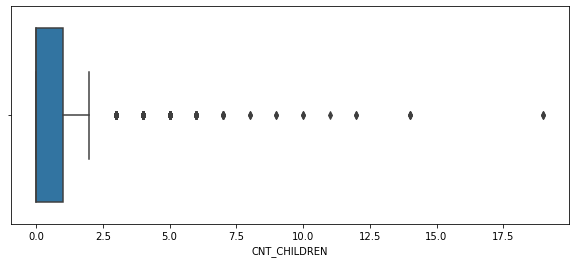

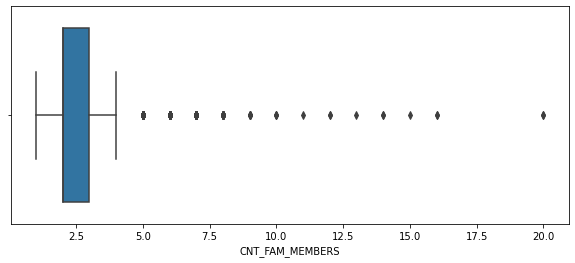

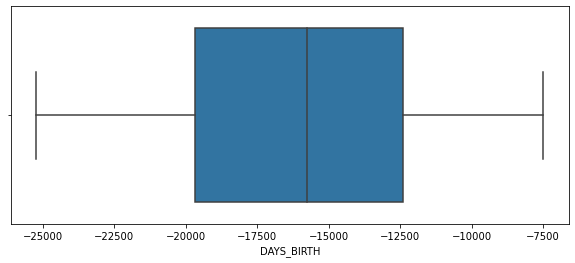

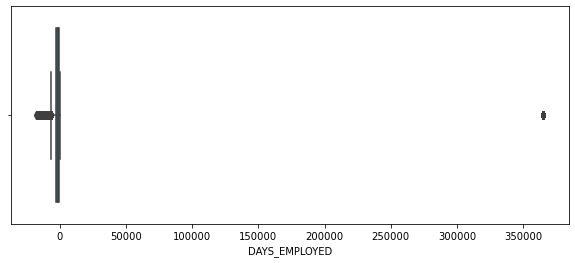

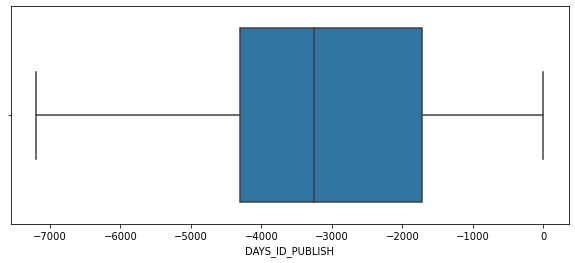

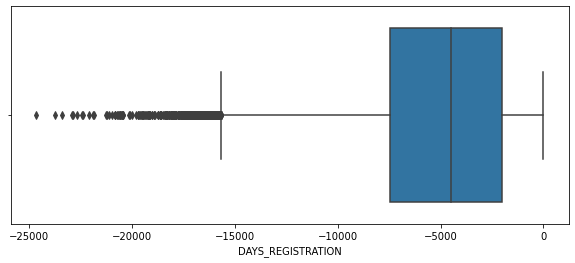

In [113]:
plt_list=['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION'
]
for i in plt_list:
    plt.figure(figsize=[10,4])
    sns.boxplot(ad[i])
    plt.show()

<font color='green'>
Insight from the Box Plot
 </font>

The following columns are having some outliers in boxplots, need to check in details:

1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. DAYS_EMPLOYED
4. CNT_FAM_MEMBERS
5. AMT_REQ_CREDIT_BUREAU_QRT

<font color='blue'>
Doing univariate analysis on some of the important columns
</font>

In [114]:
ad.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [117]:
ad.CNT_CHILDREN.value_counts(normalize=True).sort_values(ascending=False)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

In [119]:
ad.CNT_CHILDREN[ad.CNT_CHILDREN > 8].sum()/len(ad.CNT_CHILDREN)*100

0.04975431773172342

<font color='green'>
A small fraction of clients have more than 8 children, the highest no of childrens being 19. 
   </font>

In [120]:
ad.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [121]:
ad.AMT_INCOME_TOTAL.value_counts(normalize=True)

135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64

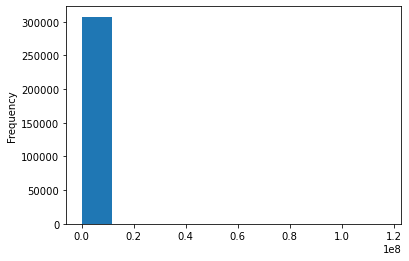

In [123]:
ad.AMT_INCOME_TOTAL.plot.hist()
plt.show()

In [125]:
ad.AMT_INCOME_TOTAL.quantile([1.0, 0.99, 0.95,0.75])

1.00    117000000.0
0.99       472500.0
0.95       337500.0
0.75       202500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [126]:
ad=ad[ad.AMT_INCOME_TOTAL<472500]
ad.shape

(304417, 44)

<font color='green'>
Since some of the clients have very high income as compared rest mass so removing them from the dataset for better analysis.
    </font>

In [127]:
ad.CNT_FAM_MEMBERS.describe()

count    304417.000000
mean          2.151453
std           0.910028
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [129]:
ad.CNT_FAM_MEMBERS.value_counts(normalize=True).sort_values(ascending=False)

2.0     0.515103
1.0     0.220970
3.0     0.170874
4.0     0.080127
5.0     0.011221
6.0     0.001311
7.0     0.000263
8.0     0.000066
9.0     0.000020
10.0    0.000010
14.0    0.000007
12.0    0.000007
20.0    0.000007
16.0    0.000007
13.0    0.000003
15.0    0.000003
11.0    0.000003
Name: CNT_FAM_MEMBERS, dtype: float64

In [133]:
ad.CNT_FAM_MEMBERS[ad.CNT_FAM_MEMBERS > 10].sum()/len(ad.CNT_FAM_MEMBERS)*100

0.0535449728497423

<font color='green'>
The highest family size observed is 20. But only 0.05% clients have big family with members more than 10.
   </font>

In [134]:
ad.DAYS_EMPLOYED.describe()

count    304417.000000
mean      64255.502584
std      141638.808199
min      -17912.000000
25%       -2754.000000
50%       -1207.000000
75%        -285.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

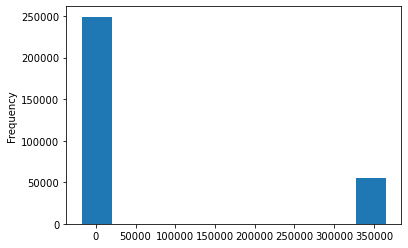

In [135]:
ad.DAYS_EMPLOYED.plot.hist()
plt.show()

In [136]:
ad.DAYS_EMPLOYED.quantile([0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99, 1.0]) 

0.25     -2754.0
0.50     -1207.0
0.75      -285.0
0.80      -140.2
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [147]:
ad.DAYS_EMPLOYED[ad.DAYS_EMPLOYED>0] 

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55180, dtype: int64

In [148]:
ad.DAYS_EMPLOYED[ad.DAYS_EMPLOYED>0].unique()

array([365243], dtype=int64)

<font color ='green'>
Clients having 365243 days of employment is nearly impossible which is more than 1000 years so need to drop these incorrect data.
   </font>

In [149]:
ad=ad[ad.DAYS_EMPLOYED<365243]
ad.shape

(249237, 44)

In [150]:
ad.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    249237.000000
mean          0.224991
std           0.773658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [153]:
ad.AMT_REQ_CREDIT_BUREAU_QRT.value_counts().sort_values(ascending=False)

0      208989
1       27091
2       11352
3        1351
4         367
5          50
6          22
8           7
7           6
261         1
19          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [155]:
ad.DAYS_EMPLOYED[ad.AMT_REQ_CREDIT_BUREAU_QRT>5].count()/len(ad.AMT_REQ_CREDIT_BUREAU_QRT)*100

0.014845307879648688

<font color='green'>
For only 0.014% of clients the enquiry has been done more than 5 times. There are only 2 clients for whom enquiry is done more no of times which kight the case for some recognised person or business man.
   </font>

<font color='blue'>
Analysis the TARGET variable
</font>

In [156]:
ad.TARGET.value_counts(normalize=True)*100 

0    91.304662
1     8.695338
Name: TARGET, dtype: float64

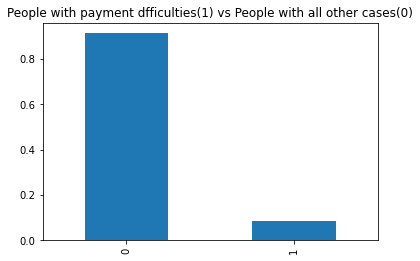

In [157]:
ad.TARGET.value_counts(normalize=True).plot.bar() 
plt.title(label='People with payment dfficulties(1) vs People with all other cases(0)')
plt.show()

In [158]:
ad_target_1=ad[ad.TARGET==1]
ad_target_0=ad[ad.TARGET==0]
print(ad_target_1.shape, ad_target_0.shape)

(21672, 44) (227565, 44)


<font color='blue'>
Bivariate analysis using some of the categorical variables
   </font>

In [172]:
cat_cols=['CODE_GENDER','NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE',
          'NAME_INCOME_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE']

<font color='blue'>
Plotting graphs on some of the categorical variables for TARGET=1 for the client with payment difficulties
</font>

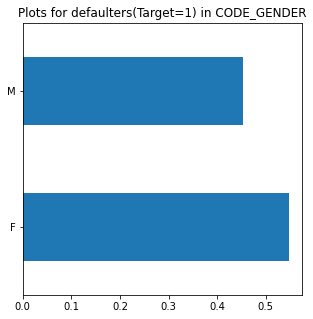

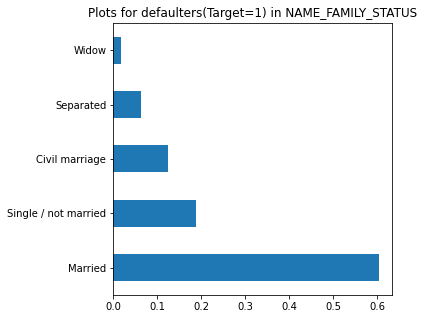

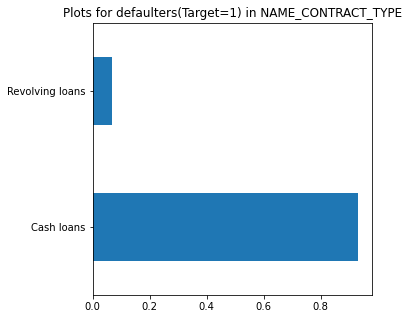

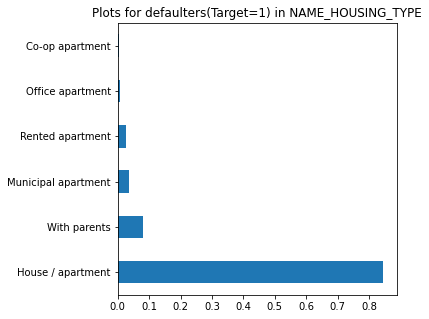

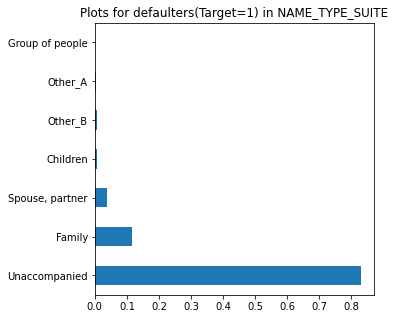

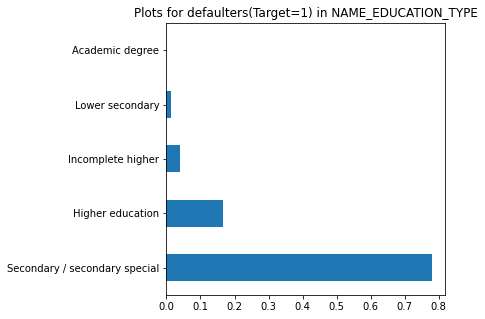

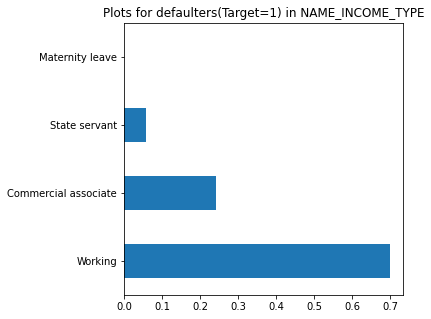

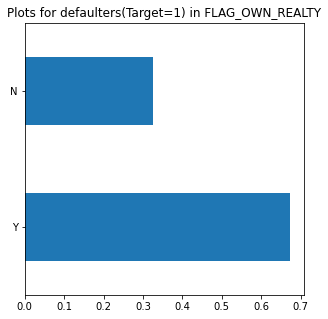

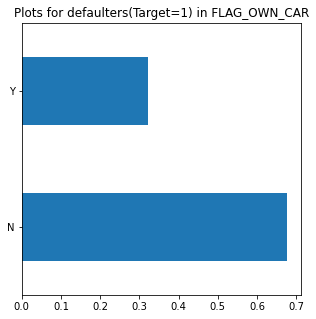

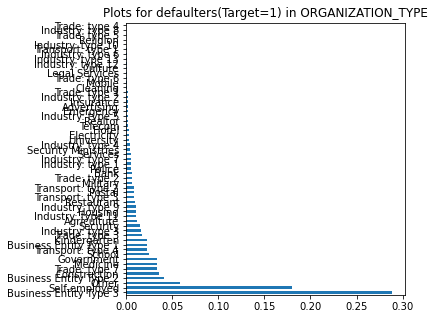

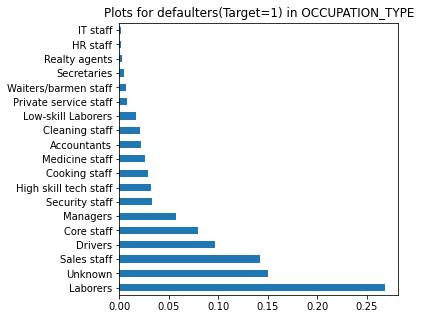

In [173]:
for i in cat_cols:
    plt.figure(figsize=(5,5))
    ad_target_1[i].value_counts(normalize=True).plot.barh()
    plt.title(label='Plots for defaulters(Target=1) in '+i)
    plt.show()

<font color='blue'>
Plotting graphs on some of the categorical variables for TARGET=0 for the client with other cases
</font>

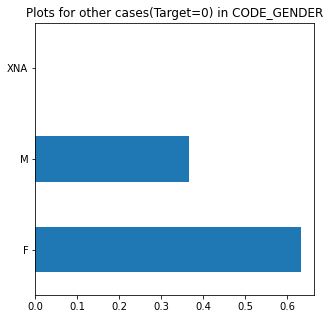

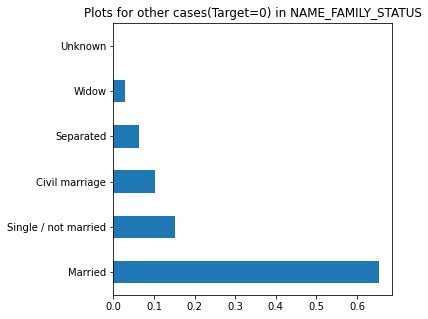

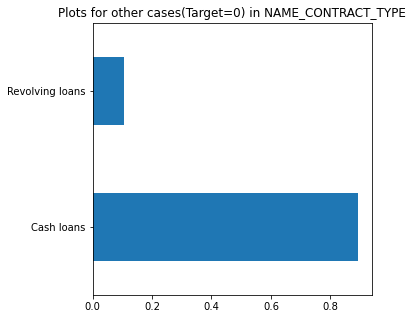

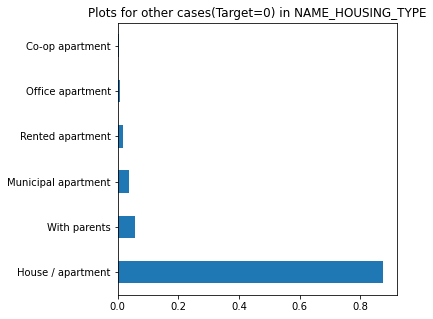

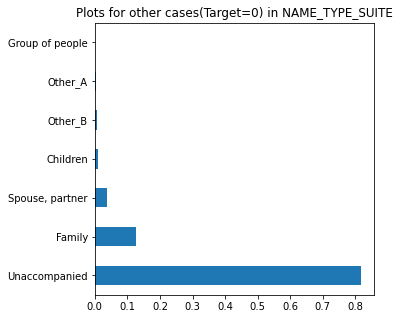

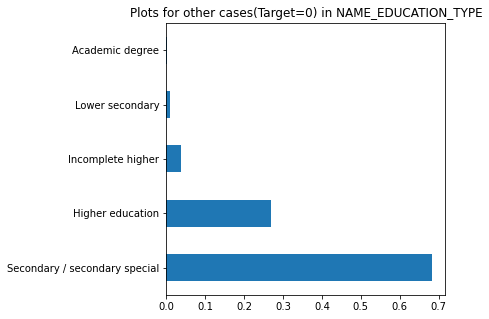

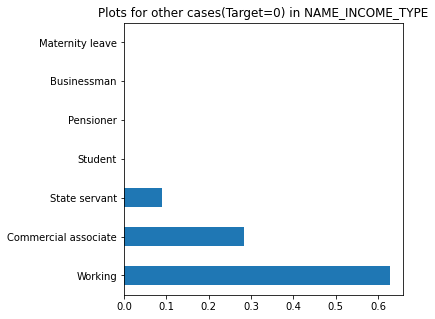

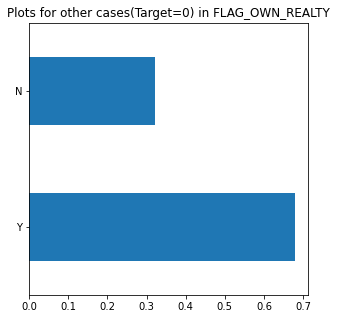

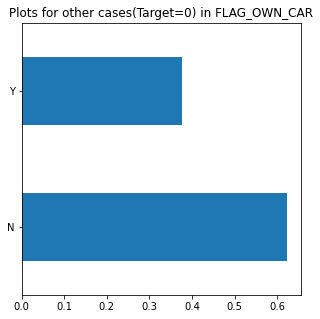

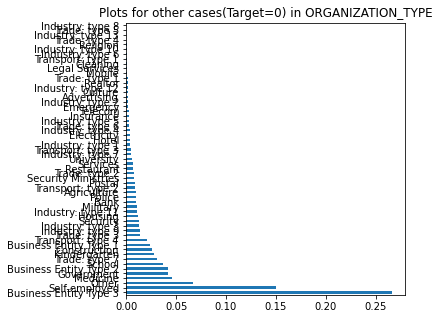

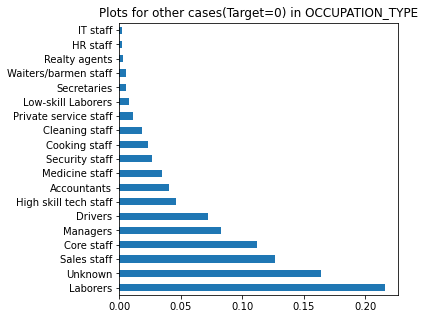

In [174]:
for i in cat_cols:
    plt.figure(figsize=(5,5))
    ad_target_0[i].value_counts(normalize=True).plot.barh()
    plt.title(label='Plots for other cases(Target=0) in '+i)
    plt.show()

<font color='green'>
Its seems Laborers are having difficulty payment and they are also paying the loan on time.Things are not very clear as to which occupation clients will have payment difficulty.
</font>

In [180]:
ad.groupby(by='OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

OCCUPATION_TYPE
Low-skill Laborers       0.171524
Drivers                  0.113196
Waiters/barmen staff     0.113011
Security staff           0.107436
Laborers                 0.105847
Cooking staff            0.104510
Sales staff              0.096446
Cleaning staff           0.095607
Unknown                  0.080587
Realty agents            0.078983
Secretaries              0.070988
IT staff                 0.067194
Medicine staff           0.067058
Private service staff    0.066185
HR staff                 0.064865
Core staff               0.063237
Managers                 0.062322
High skill tech staff    0.061768
Accountants              0.048988
Name: TARGET, dtype: float64

<font color ='blue'>
Mutivariate analysis
    </font>

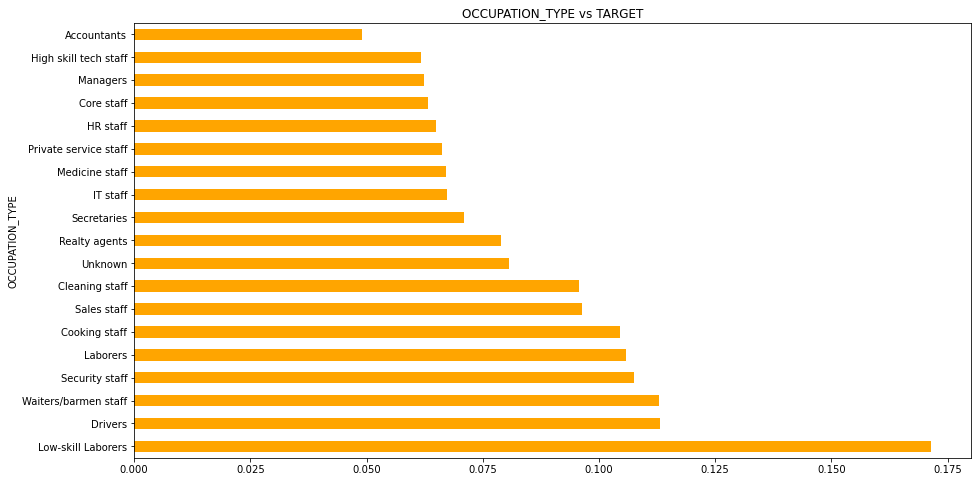

In [257]:
#OCCUPATION_TYPE vs TARGET
plt.figure(figsize=(15,8))
ad.groupby(by='OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.barh(color='Orange')
plt.title('OCCUPATION_TYPE vs TARGET')
plt.show()

<font color ='green'>
Insights from OCCUPATION_TYPE vs TARGET
</font>
1. Low-skill laborers, Drivers, Waiters,etc are likely to face payment difficulties since their income is less.
2. Accountants, High-skill staffs, Managers, etc will pay the load on time

In [190]:
ad_target_1.groupby(by='NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False)

NAME_FAMILY_STATUS
Civil marriage          1.0
Married                 1.0
Separated               1.0
Single / not married    1.0
Widow                   1.0
Name: TARGET, dtype: float64

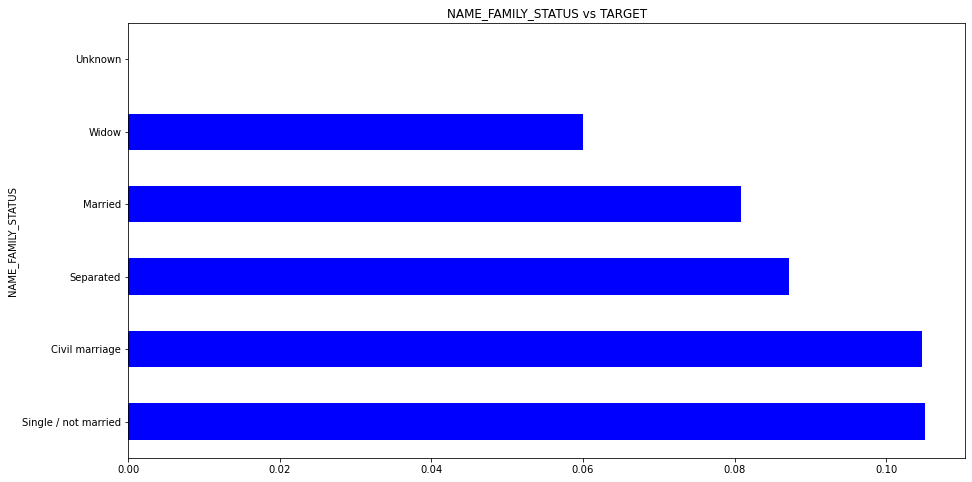

In [204]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False).plot.barh(color='Blue')
plt.title('NAME_FAMILY_STATUS vs TARGET')
plt.show()


<font color='green'>
Insights from NAME_FAMILY_STATUS vs TARGET
</font>
1. Single/unmarried and Civil marriage clients more likely to have payment difficulties.
2. Widow and Married people might not face the payment difficulty. 

In [194]:
ad.groupby(by='NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_INCOME_TYPE
Maternity leave         0.400000
Working                 0.096023
Commercial associate    0.075476
State servant           0.057714
Businessman             0.000000
Pensioner               0.000000
Student                 0.000000
Name: TARGET, dtype: float64

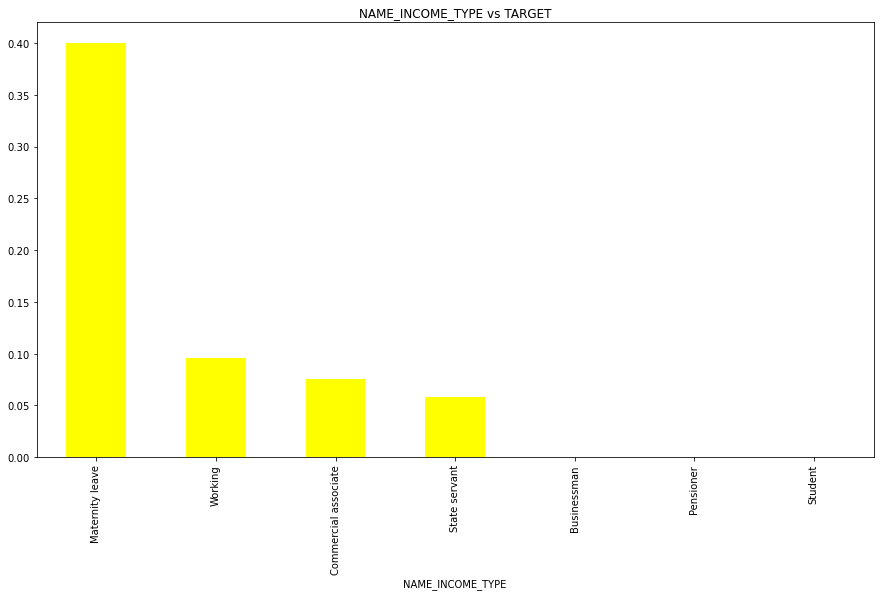

In [205]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Yellow')
plt.title('NAME_INCOME_TYPE vs TARGET')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='green'>
Insights from NAME_INCOME_TYPE vs TARGET:-
    </font>
    1. Clients on Maternity Leave and working are more likely to default in loan payment.
    2. Businessman, Pensioner and Students are more likely to pay the loan on time since Businessman will have enough money to pay, Pensioner will have secure their payment and Students will be supported by there parents.

In [196]:
ad.groupby(by='NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_HOUSING_TYPE
Rented apartment       0.125943
With parents           0.118186
Municipal apartment    0.090049
House / apartment      0.084137
Co-op apartment        0.083000
Office apartment       0.067022
Name: TARGET, dtype: float64

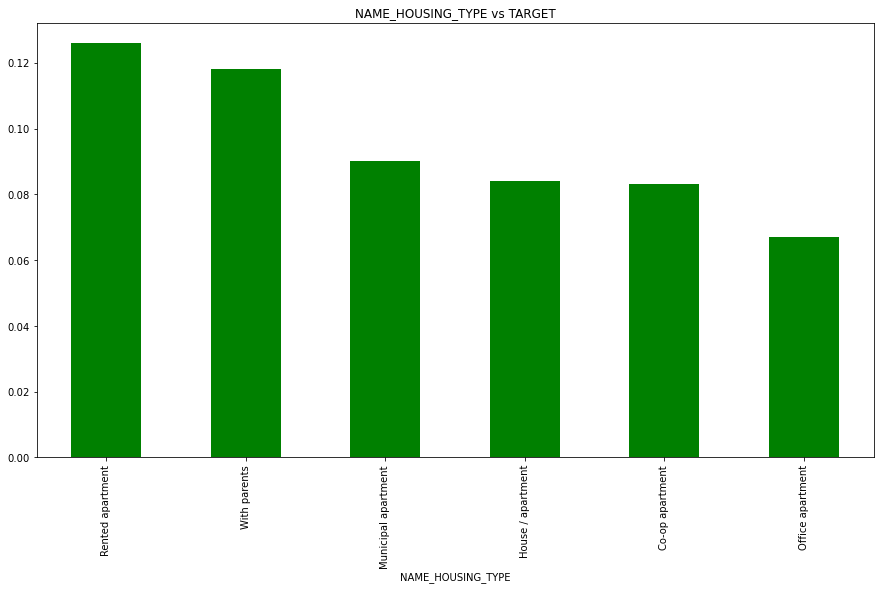

In [206]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Green')
plt.title('NAME_HOUSING_TYPE vs TARGET')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='green'>
Insights from NAME_HOUSING_TYPE vs TARGET
</font
    
1. Clients living in Rented Apartments or living with their parents are more likely to face payment difficulty either they have low income or have more expenses like paying house rent and all.
2. Clients living in Office Apartments or Co-op apartment or own house will not face payment difficulty. Since they might no tbe paying house rent they can afford.

In [198]:
ad.groupby(by='NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_EDUCATION_TYPE
Lower secondary                  0.138279
Secondary / secondary special    0.098111
Incomplete higher                0.087006
Higher education                 0.055551
Academic degree                  0.022901
Name: TARGET, dtype: float64

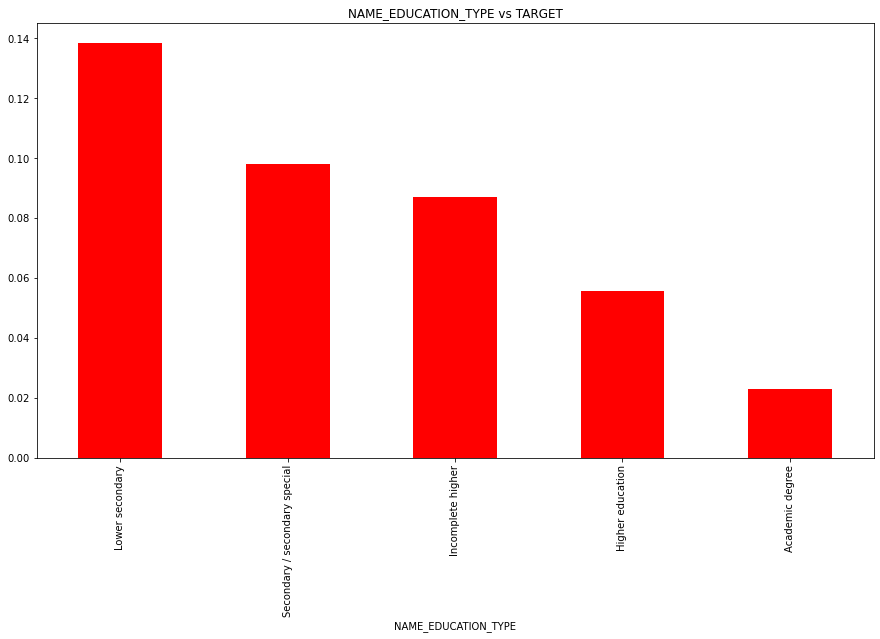

In [207]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Red')
plt.title('NAME_EDUCATION_TYPE vs TARGET')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='green'>
Insights from NAME_EDUCATION_TYPE vs TARGET:-
    </font>
    
1. Clients with Lower secondary education more likely to face payment difficulty.
2. Clients with some Academic Degree will be safe to approve the loan.

In [208]:
ad.groupby(by='NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False)

NAME_TYPE_SUITE
Other_B            0.106164
Group of people    0.103774
Other_A            0.089828
Unaccompanied      0.088170
Spouse, partner    0.083794
Family             0.079759
Children           0.075615
Name: TARGET, dtype: float64

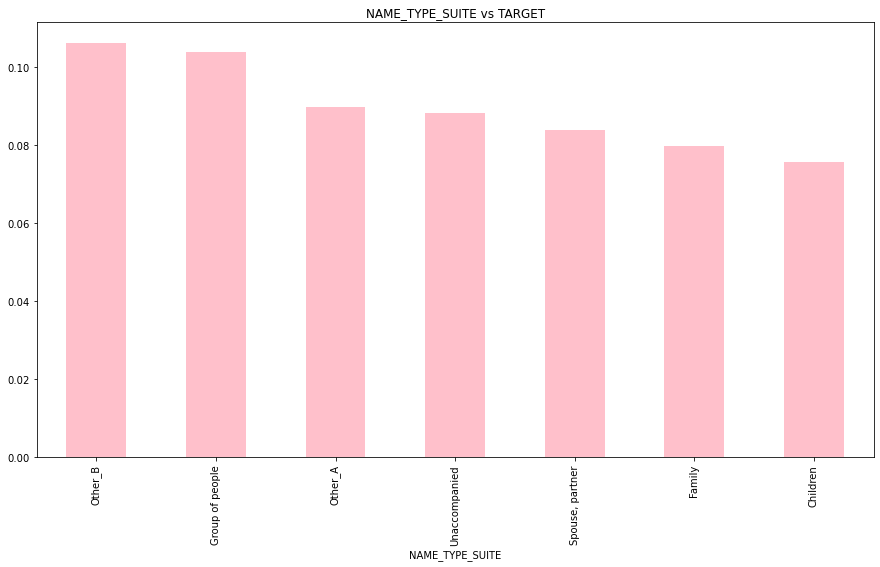

In [210]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Pink')
plt.title('NAME_TYPE_SUITE vs TARGET')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='green'>
Insights from NAME_TYPE_SUITE vs TARGET
</font>
Clients who were accompanied with Childern, spouse or any family members are less likely to default the load payment than others. 

In [211]:
ad.groupby(by='CODE_GENDER')['TARGET'].mean().sort_values(ascending=False)

CODE_GENDER
M      0.105190
F      0.076045
XNA    0.000000
Name: TARGET, dtype: float64

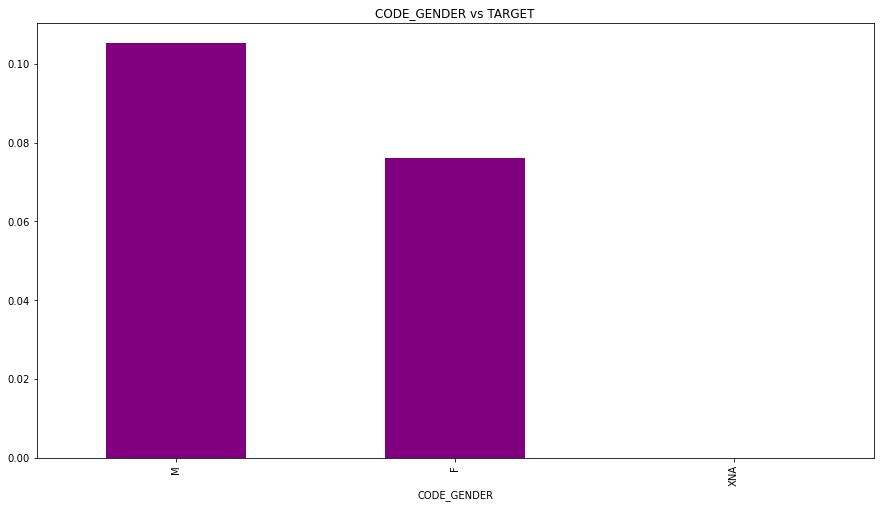

In [213]:
plt.figure(figsize=(15,8))
ad.groupby(by='CODE_GENDER')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Purple')
plt.title('CODE_GENDER vs TARGET')
plt.show()

<font color='green'>
Insights from CODE_GENDER vs TARGET
</font>
Male clients are more likely to deafult the loan payment than female clients.

In [215]:
ad.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    66812
Self-employed             38123
Other                     16514
Medicine                  11122
Business Entity Type 2    10460
Government                10337
School                     8854
Trade: type 7              7752
Kindergarten               6866
Construction               6629
Business Entity Type 1     5887
Transport: type 4          5342
Trade: type 3              3463
Industry: type 9           3305
Industry: type 3           3265
Security                   3225
Housing                    2940
Industry: type 11          2690
Military                   2560
Agriculture                2443
Bank                       2436
Police                     2315
Transport: type 2          2193
Postal                     2151
Security Ministries        1937
Trade: type 2              1861
Restaurant                 1795
Services                   1553
University                 1308
Industry: type 7           1300
Transport: type 3          1180
Industry

In [216]:
ad.ORGANIZATION_TYPE= ad.ORGANIZATION_TYPE.replace(['Business Entity Type 3', 'Business Entity Type 2','Business Entity Type 1'], "Business Entity")

ad.ORGANIZATION_TYPE= ad.ORGANIZATION_TYPE.replace(['Trade: type 7', 'Trade: type 6','Trade: type 5','Trade: type 4','Trade: type 3','Trade: type 2','Trade: type 1'], "Trade")

ad.ORGANIZATION_TYPE= ad.ORGANIZATION_TYPE.replace(['Industry: type 13', 'Industry: type 12','Industry: type 11','Industry: type 10', 'Industry: type 9','Industry: type 8','Industry: type 7', 'Industry: type 6','Industry: type 5','Industry: type 4', 'Industry: type 3','Industry: type 2', 'Industry: type 1'], "Industry")

ad.ORGANIZATION_TYPE= ad.ORGANIZATION_TYPE.replace(['Transport: type 1', 'Transport: type 2','Transport: type 3','Transport: type 4'], "Transport")

In [217]:
ad.ORGANIZATION_TYPE.value_counts()

Business Entity        83159
Self-employed          38123
Other                  16514
Industry               14171
Trade                  14156
Medicine               11122
Government             10337
Transport               8912
School                  8854
Kindergarten            6866
Construction            6629
Security                3225
Housing                 2940
Military                2560
Agriculture             2443
Bank                    2436
Police                  2315
Postal                  2151
Security Ministries     1937
Restaurant              1795
Services                1553
University              1308
Hotel                    962
Electricity              943
Insurance                579
Telecom                  573
Emergency                554
Advertising              415
Realtor                  384
Culture                  375
Mobile                   313
Legal Services           291
Cleaning                 258
Religion                  84
Name: ORGANIZA

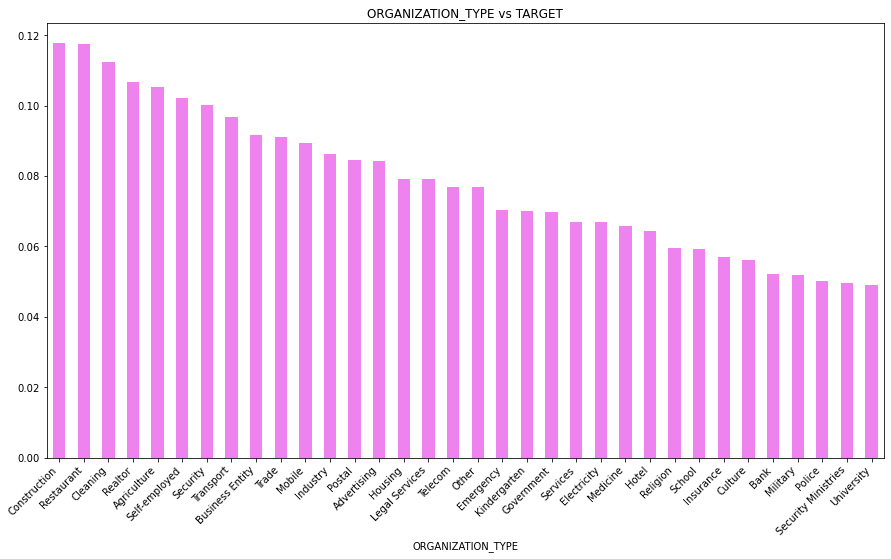

In [220]:
plt.figure(figsize=(15,8))
ad.groupby(by='ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Violet')
plt.title('ORGANIZATION_TYPE vs TARGET')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='green'>
Insights from ORGANIZATION_TYPE vs TARGET:-
</font>

1. Clients working in Construction, Resturants and in Cleaning jobs are more likely to deafult in loan payment.
2. Clients working in Police, Security Ministries and University are more safe for loan approval.

In [239]:
ad.groupby(by='NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_CONTRACT_TYPE
Cash loans         0.090336
Revolving loans    0.057152
Name: TARGET, dtype: float64

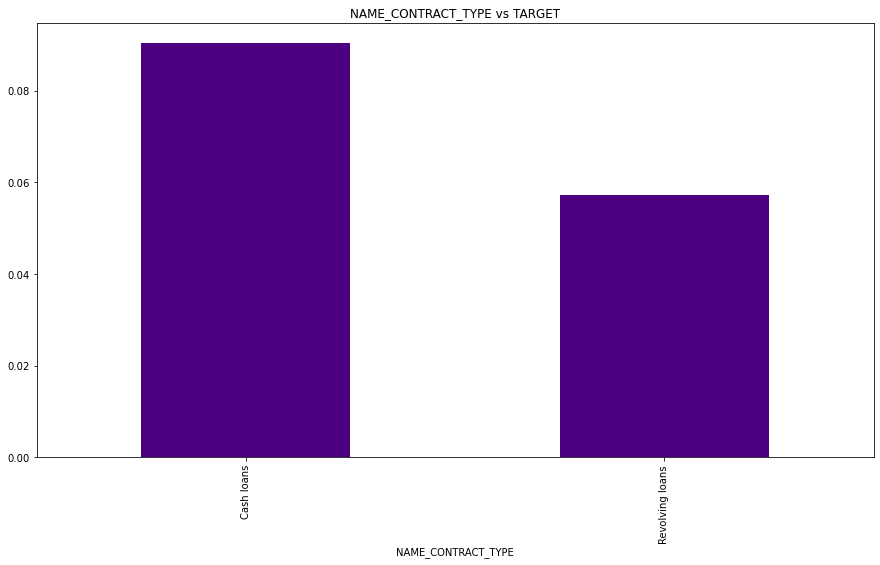

In [241]:
plt.figure(figsize=(15,8))
ad.groupby(by='NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Indigo')
plt.title('NAME_CONTRACT_TYPE vs TARGET')
plt.show()

<font color='green'>
Insights from NAME_CONTRACT_TYPE vs TARGET:-
    </font>
Revolving loans are more likely to be repaid than Cash Loans. Hence issuing Revolving loans will be beneficial.

In [221]:
ad.AMT_INCOME_TOTAL.describe()

count    249237.000000
mean     169184.360717
std       77900.454500
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [230]:
ad.AMT_INCOME_TOTAL.quantile([0,0.25,0.50,0.75,1])

0.00     25650.0
0.25    112500.0
0.50    157500.0
0.75    202500.0
1.00    469800.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [254]:
#Grouping the income levels 
ad['Income_Groups']=pd.cut(ad.AMT_INCOME_TOTAL,bins=[25650.0,112500.0,157500.0,202500.0,469800.0],labels=['Low Income Group', 'Middle Income Group', 'High Income Group' , 'Very High Income Group'])
ad.shape

(249237, 45)

<font color='blue'>Multivariate analysis using heatmaps</font>

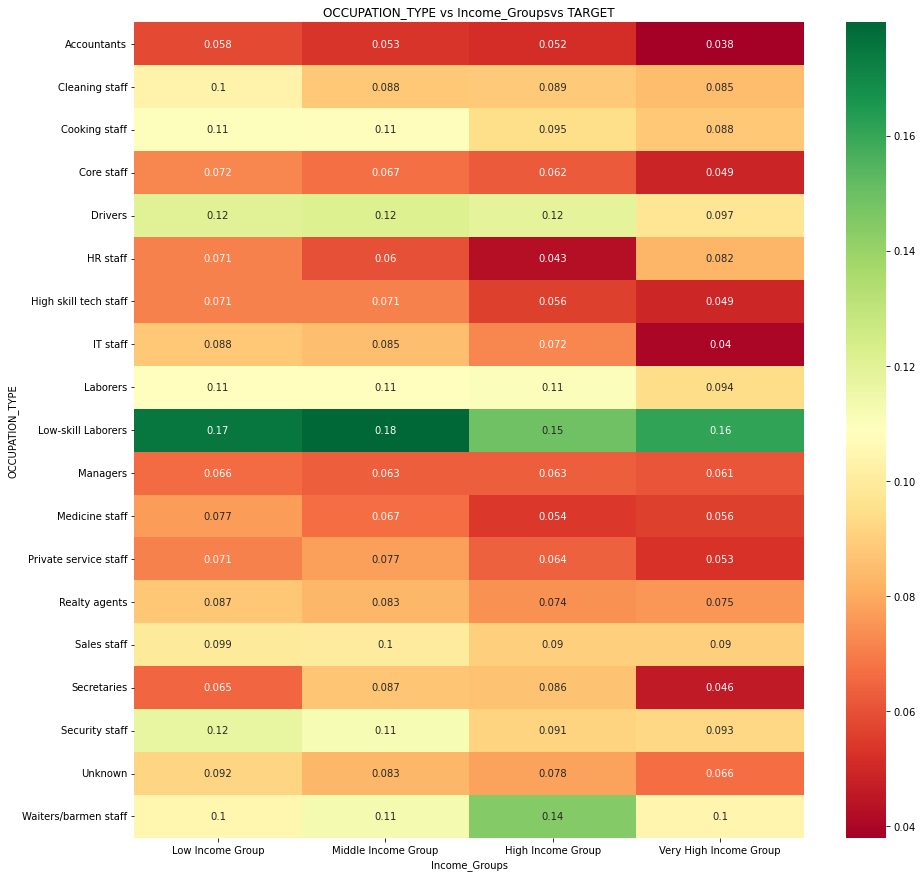

In [335]:
plt.figure(figsize=(15,15))
pt=pd.pivot_table(ad, index='OCCUPATION_TYPE', columns='Income_Groups',values='TARGET', aggfunc='mean')
sns.heatmap(pt,annot=True, cmap='RdYlGn')
plt.title('OCCUPATION_TYPE vs Income_Groupsvs TARGET')
plt.show()

<font color='green'>
Insights from Heatmap:-
    </font>
    
    1. Low skill Laborers in any income group are more likely to have payment difficulties so they have higher risk.
    2. Accountants and Secretaries with very high income a d IT and HR staffs with high and very high income are with less risk to approve the loan.

<font color='blue'>Plotting Numeric data</font>

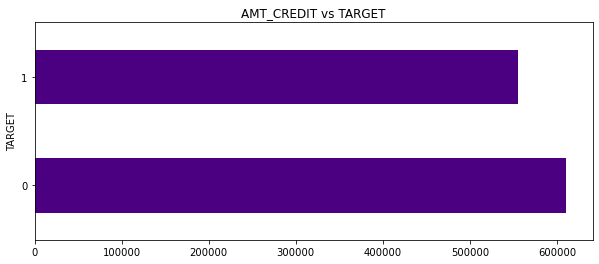

In [267]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['AMT_CREDIT'].mean().sort_values(ascending=False).plot.barh(color='Indigo')
plt.title('AMT_CREDIT vs TARGET')
plt.show()

<font color='green'>
Insights from AMT_CREDIT vs TARGET
</font>
Clients with lower credit amount pose higher risk

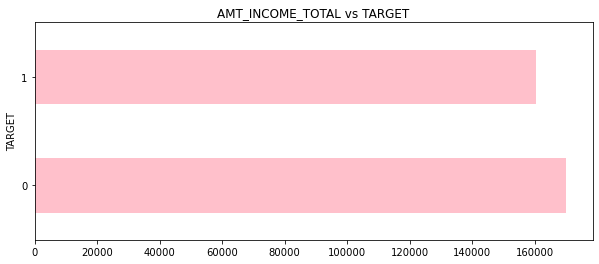

In [268]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False).plot.barh(color='Pink')
plt.title('AMT_INCOME_TOTAL vs TARGET')
plt.show()

<font color='green'>
Insights from AMT_INCOME_TOTAL vs TARGET:-
</font>
Clients with lower income pose higher threat

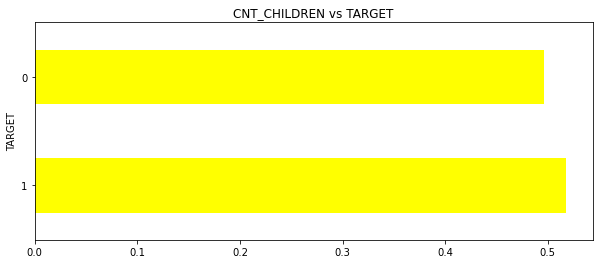

In [266]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['CNT_CHILDREN'].mean().sort_values(ascending=False).plot.barh(color='Yellow')
plt.title('CNT_CHILDREN vs TARGET')
plt.show()

<font color='green'>
Insights from CNT_CHILDREN vs TARGET:-
    </font>
Clients with more childer pose higher threat for defaulting the loan payment may be due to higher expense.

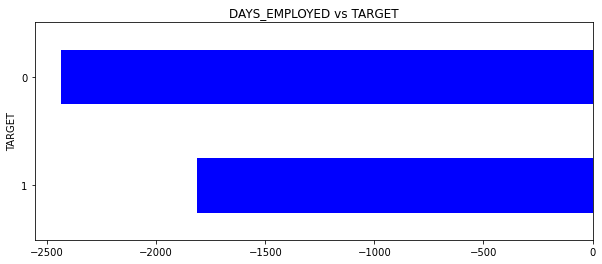

In [274]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['DAYS_EMPLOYED'].mean().sort_values(ascending=False).plot.barh(color='Blue')
plt.title('DAYS_EMPLOYED vs TARGET')
plt.show()

<font color='green'>
Insights from DAYS_EMPLOYED vs TARGET
</font>
Clients employed for less no of days before applying for loan are at high risk for defaulting the payment.

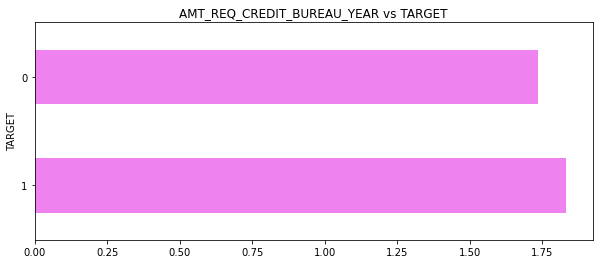

In [333]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['AMT_REQ_CREDIT_BUREAU_YEAR'].mean().sort_values(ascending=False).plot.barh(color='Violet')
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR vs TARGET')
plt.show()

<font color='green'>
Insights from AMT_REQ_CREDIT_BUREAU_YEAR vs TARGET
</font>
Clients with higher no of enquiries to Credit Bureau ina year pose high risk

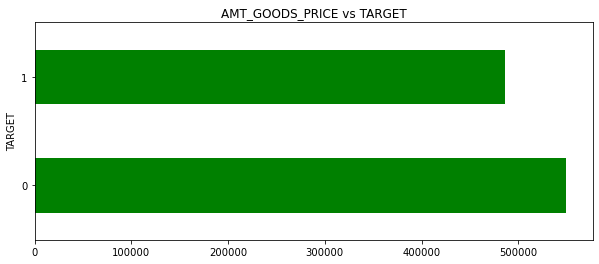

In [273]:
plt.figure(figsize=(10,4))
ad.groupby(by='TARGET')['AMT_GOODS_PRICE'].mean().sort_values(ascending=False).plot.barh(color='Green')
plt.title('AMT_GOODS_PRICE vs TARGET')
plt.show()

<font color='green'>
Insights from AMT_GOODS_PRICE vs TARGET:-
    </font>
Clients with higher goods price pose lower risk.

<font color='blue'>Analysing Pervious application data set</font>

In [276]:
###Previous app data
pa.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [277]:
pa.shape

(1670214, 37)

In [278]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [279]:
#checking null values in previous application data
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [280]:
#handling the null values
nv2=pa.isnull().sum()/len(pa)*100
nv2

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [281]:
nulls40_2=nv2[nv2>40]
len(nulls40_2)

11

In [282]:
#dropping the columns with more than 40% null values
pa.drop(columns=nulls40_2.index, inplace=True)
pa.shape

(1670214, 26)

In [285]:
pa.isnull().sum() > 0.0

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                     True
AMT_APPLICATION                False
AMT_CREDIT                      True
AMT_GOODS_PRICE                 True
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                     True
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION             True
dtype: bool

In [287]:
#removing the missing records
pa= pa[~pa.AMT_ANNUITY.isnull()]
pa= pa[~pa.AMT_CREDIT.isnull()]
pa= pa[~pa.AMT_GOODS_PRICE.isnull()]
pa= pa[~pa.CNT_PAYMENT.isnull()]
pa= pa[~pa.PRODUCT_COMBINATION.isnull()]

In [288]:
pa.shape

(1246320, 26)

In [289]:
#Analysing NAME_CONTRACT_STATUS variable
pa.NAME_CONTRACT_STATUS.value_counts()

Approved        993938
Refused         240969
Canceled         10503
Unused offer       910
Name: NAME_CONTRACT_STATUS, dtype: int64

In [290]:
#Sanity check
pa.isnull().sum() > 0.0

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                    False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
dtype: bool

<font color='Blue'>Plotting some of the numeric variables</font>

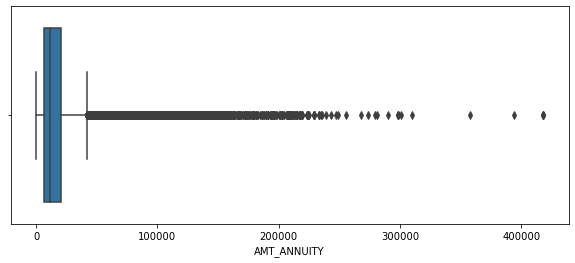

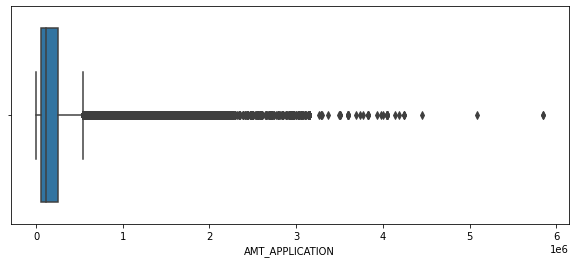

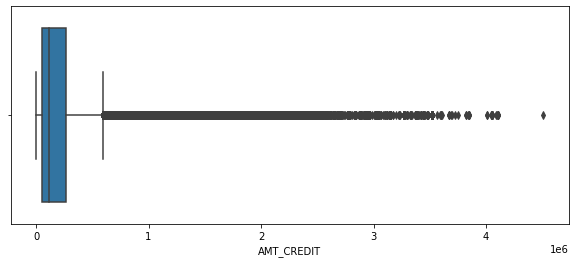

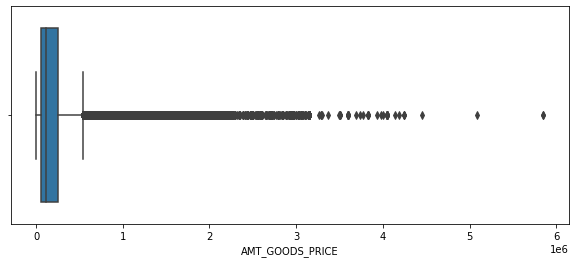

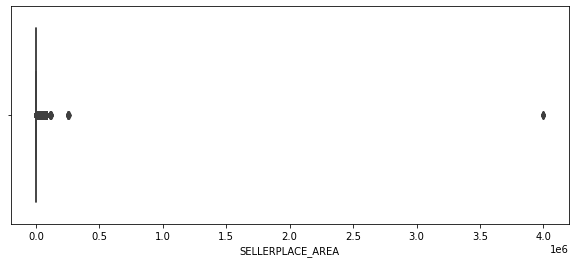

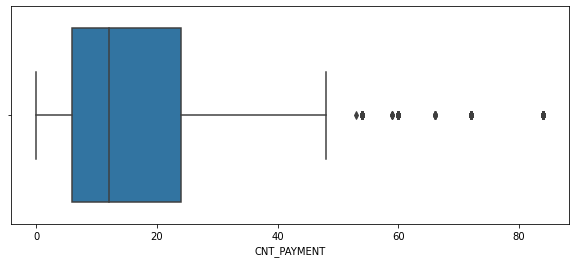

In [291]:
plt_list2=['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

for i in plt_list2:
    plt.figure(figsize=[10,4])
    sns.boxplot(pa[i])
    plt.show()

<font color='green'>
Insights from the box plot:-
    </font>
    
    These ouliers are valid data and not actually outliers

In [292]:
pa.AMT_GOODS_PRICE.describe()

count    1.246320e+06
mean     2.326240e+05
std      3.186729e+05
min      0.000000e+00
25%      5.220000e+04
50%      1.125000e+05
75%      2.475000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<font color='blue'> Merging 2 data sets</font>


In [296]:
md = pd.merge(left=ad[['SK_ID_CURR', 'TARGET']],right=pa, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863117 entries, 0 to 863116
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   863117 non-null  int64  
 1   TARGET                       863117 non-null  int64  
 2   SK_ID_PREV                   849042 non-null  float64
 3   NAME_CONTRACT_TYPE           849042 non-null  object 
 4   AMT_ANNUITY                  849042 non-null  float64
 5   AMT_APPLICATION              849042 non-null  float64
 6   AMT_CREDIT                   849042 non-null  float64
 7   AMT_GOODS_PRICE              849042 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   849042 non-null  object 
 9   HOUR_APPR_PROCESS_START      849042 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  849042 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       849042 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE       849042 non-null  object 
 13 

In [297]:
md.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002       1   1038818.0     Consumer loans     9251.775   
1      100003       0   1810518.0         Cash loans    98356.995   
2      100003       0   2636178.0     Consumer loans    64567.665   
3      100003       0   2396755.0     Consumer loans     6737.310   
4      100004       0   1564014.0     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0         179055.0    179055.0         179055.0                   SATURDAY   
1         900000.0   1035882.0         900000.0                     FRIDAY   
2         337500.0    348637.5         337500.0                     SUNDAY   
3          68809.5     68053.5          68809.5                   SATURDAY   
4          24282.0     20106.0          24282.0                     FRIDAY   

   HOUR_APPR_PROCESS_START  ... NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0                      9.0  ...              New              Vehicles   
1                     12.0  ...         Repeater                   XNA   
2                     17.0  ...        Refreshed             Furniture   
3                     15.0  ...        Refreshed  Consumer Electronics   
4                      5.0  ...              New                Mobile   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0            POS               XNA                    Stone            500.0   
1           Cash            x-sell  Credit and cash offices             -1.0   
2            POS               XNA                    Stone           1400.0   
3            POS               XNA             Country-wide            200.0   
4            POS               XNA         Regional / Local             30.0   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0       Auto technology        24.0       low_normal   
1                   XNA        12.0       low_normal   
2             Furniture         6.0           middle   
3  Consumer electronics        12.0           middle   
4          Connectivity         4.0           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 27 columns]

In [298]:
md.shape

(863117, 27)

In [306]:
md.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Refused         0.124675
Unused offer    0.105978
Canceled        0.087358
Approved        0.081778
Name: TARGET, dtype: float64

<font color='blue'>Data Visualization on merged dataset</font>

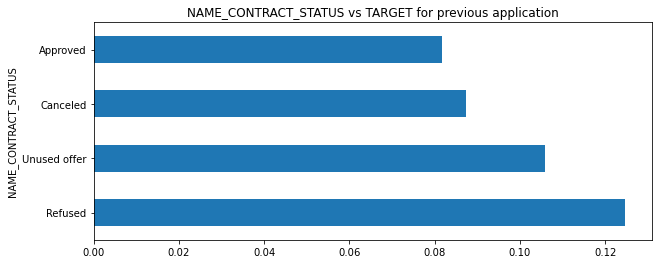

In [305]:
plt.figure(figsize=(10,4))
(md.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False)).plot.barh()
plt.title('NAME_CONTRACT_STATUS vs TARGET for previous application')
plt.show()

<font color='green'>
Insight from NAME_CONTRACT_STATUS vs TARGET for previous application:-
</font>
Clients who were refused loan previously are the one who will have payment difficulty. The right decision is to refuse the loan.

In [307]:
md.groupby('NAME_CLIENT_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_CLIENT_TYPE
XNA          0.099278
New          0.096138
Repeater     0.089816
Refreshed    0.075420
Name: TARGET, dtype: float64

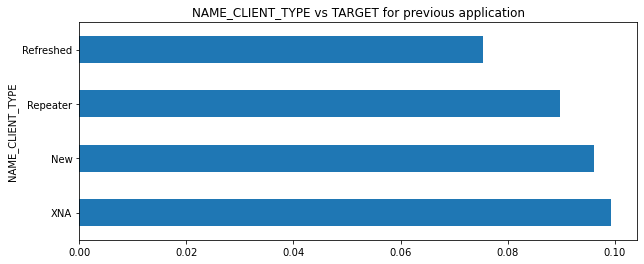

In [308]:
plt.figure(figsize=(10,4))
(md.groupby('NAME_CLIENT_TYPE')['TARGET'].mean().sort_values(ascending=False)).plot.barh()
plt.title('NAME_CLIENT_TYPE vs TARGET for previous application')
plt.show()

In [309]:
md.groupby('NAME_YIELD_GROUP')['TARGET'].mean().sort_values(ascending=False)

NAME_YIELD_GROUP
XNA           0.120331
high          0.100979
middle        0.087060
low_normal    0.077409
low_action    0.068807
Name: TARGET, dtype: float64

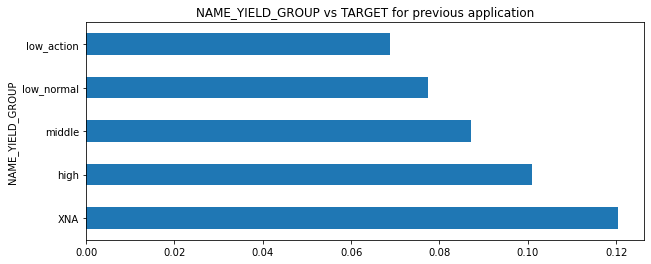

In [310]:
plt.figure(figsize=(10,4))
(md.groupby('NAME_YIELD_GROUP')['TARGET'].mean().sort_values(ascending=False)).plot.barh()
plt.title('NAME_YIELD_GROUP vs TARGET for previous application')
plt.show()

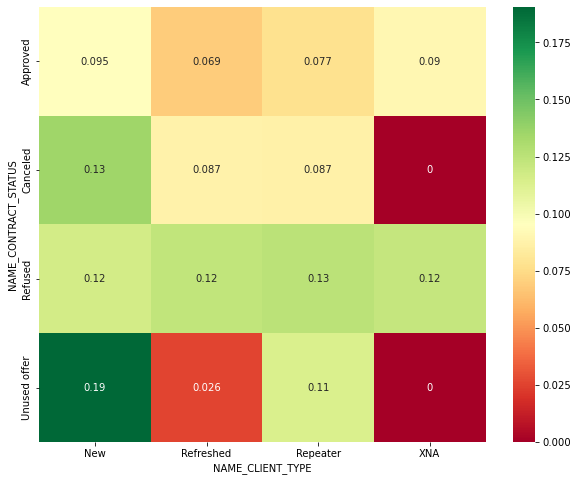

In [317]:
plt.figure(figsize=(10,8))
pt_md=pd.pivot_table(md, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE',values='TARGET', aggfunc='mean')
sns.heatmap(pt_md,annot=True, cmap='RdYlGn')
plt.show()

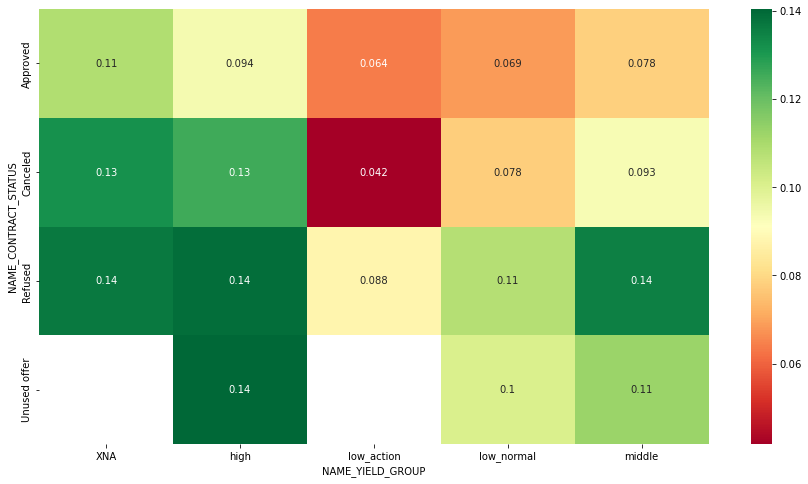

In [331]:
plt.figure(figsize=(15,8))
pt_md2=pd.pivot_table(md, index='NAME_CONTRACT_STATUS', columns='NAME_YIELD_GROUP',values='TARGET', aggfunc='mean')
sns.heatmap(pt_md2,annot=True, cmap='RdYlGn')
plt.show()

<font color='green'>
Insights from the heatmaps of merged data:-
    </font>
1. The loans which were refused to clients belonging to different yield groups are likely to default payment.
2. The loans which were refused to different clients types are likely to default payment.